<a href="https://colab.research.google.com/github/naorex/Python3rdGrade_Deep_Learning_Beginner/blob/main/Chapter04_NN%E3%81%A7%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XOR回路を学習

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=66884ea9f3b2408a7486fc56f92c683fa0e0e157113647d33fa059d4f3386aad
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


In [ ]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

In [ ]:
# 準備
input_data = [[0,0],[1,0],[0,1],[1,1]]
xor_data = [0,1,1,0]
x_train = x_test = np.array(input_data)
y_train = y_test = np.array(xor_data)

print("学習データ（問題）：")
print(x_train)
print("学習データ（答え）：")
print(y_train)

学習データ（問題）：
[[0 0]
 [1 0]
 [0 1]
 [1 1]]
学習データ（答え）：
[0 1 1 0]


In [ ]:
# model を作成
model = keras.models.Sequential()
model.add(layers.Dense(8, activation='relu', input_dim=2))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114 (456.00 B)

 Trainable params: 114 (456.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 学習を実行
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train,
                    batch_size=1,
                    epochs=500,
                    validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"テストデータの正解率: {test_acc:.2%}")

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6333 - loss: 0.6563 - val_accuracy: 0.7500 - val_loss: 0.6827
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8333 - loss: 0.6644 - val_accuracy: 0.7500 - val_loss: 0.6799
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7333 - loss: 0.6736 - val_accuracy: 0.7500 - val_loss: 0.6767
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5333 - loss: 0.7205 - val_accuracy: 0.7500 - val_loss: 0.6739
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9000 - loss: 0.6449 - val_accuracy: 0.7500 - val_loss: 0.6710
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9000 - loss: 0.6331 - val_accuracy: 0.7500 - val_loss: 0.6682
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7333 - loss: 0.6919 - val_accuracy: 0.7500 - val_loss: 0.6656
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5333 - loss: 0.7106 - val_accuracy: 0.7500 - val_loss: 

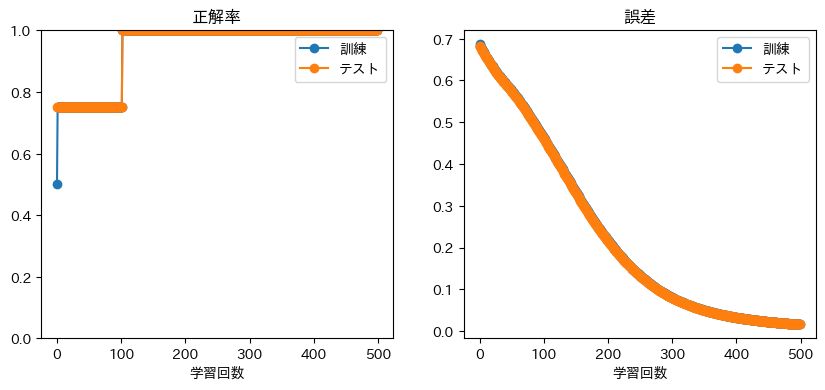

In [ ]:
# 学習の様子を可視化
param = [["正解率","accuracy","val_accuracy"],
         ["誤差","loss","val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]],"o-")
    plt.plot(history.history[param[i][2]],"o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"],loc="best")
    if i==0:
        plt.ylim(0,1)
plt.show()

In [ ]:
# モデルにデータを渡して予測
pre = model.predict(x_test)
print(pre)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
[[0.9916003  0.00839976]
 [0.01674993 0.9832501 ]
 [0.02474815 0.9752518 ]
 [0.98617154 0.01382849]]


In [ ]:
# 分かりやすいように変更
for i in range(4):
    index = np.argmax(pre[i]) # 一番高い確率の番号をindexに代入
    print(f"入力は{x_test[i]}, 出力は{index}")

入力は[0 0], 出力は0
入力は[1 0], 出力は1
入力は[0 1], 出力は1
入力は[1 1], 出力は0


# じゃんけん判定の学習

In [ ]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

In [ ]:
# データを用意
hand_name = ["グー","チョキ","パー"]
judge_name = ["あいこ","勝ち","負け"]

hand_data = [
    [0,0],[0,1],[0,2],
    [1,0],[1,1],[1,2],
    [2,0],[2,1],[2,2]
]

judge_data = [0,1,2,2,0,1,1,2,0]

x_train = x_test = np.array(hand_data)
y_train = y_test = np.array(judge_data)

print("学習データ（問題）：")
print(x_train)
print("学習データ（答え）：")
print(y_train)

学習データ（問題）：
[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]
 [2 0]
 [2 1]
 [2 2]]
学習データ（答え）：
[0 1 2 2 0 1 1 2 0]


In [ ]:
# モデルを作って学習
model = keras.models.Sequential()
model.add(layers.Dense(8, activation='relu', input_dim=2))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123 (492.00 B)

 Trainable params: 123 (492.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 学習の実行
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train,
                    epochs=1000,
                    validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"テストデータの正解率: {test_acc:.2%}")

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4444 - loss: 1.2424 - val_accuracy: 0.3333 - val_loss: 1.2362
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3333 - loss: 1.2362 - val_accuracy: 0.3333 - val_loss: 1.2302
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3333 - loss: 1.2302 - val_accuracy: 0.3333 - val_loss: 1.2243
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3333 - loss: 1.2243 - val_accuracy: 0.3333 - val_loss: 1.2184
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3333 - loss: 1.2184 - val_accuracy: 0.3333 - val_loss: 1.2130
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3333 - loss: 1.2130 - val_accuracy: 0.3333 - val_loss: 1.2081
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3333 - loss: 1.2081 - val_accuracy: 0.3333 - val_loss: 1.2033
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3333 - loss: 1.2033 - val_accuracy: 0.3333 - val

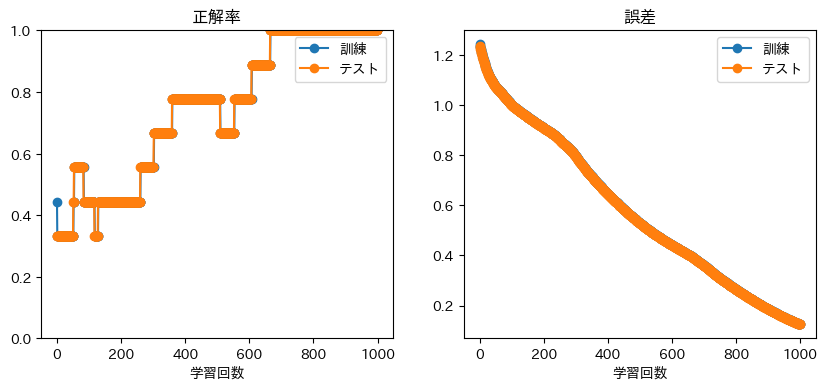

In [ ]:
# 学習の様子を可視化
param = [["正解率","accuracy","val_accuracy"],
         ["誤差","loss","val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]],"o-")
    plt.plot(history.history[param[i][2]],"o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"],loc="best")
    if i==0:
        plt.ylim(0,1)
plt.show()

In [ ]:
# データを渡して予測
pre = model.predict(x_test)
for i in range(3):
    print(f"{pre[i][0]:.0%},{pre[i][1]:.0%},{pre[i][2]:.0%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
95%,5%,0%
1%,72%,27%
0%,20%,80%


In [ ]:
# 判定を可視化
for i in range(len(x_test)):
    hand1 = hand_name[x_test[i][0]]
    hand2 = hand_name[x_test[i][1]]
    index = np.argmax(pre[i])
    judge = judge_name[index]
    print(f"私は{hand1},相手は{hand2},判定は{judge}")

私はグー,相手はグー,判定はあいこ
私はグー,相手はチョキ,判定は勝ち
私はグー,相手はパー,判定は負け
私はチョキ,相手はグー,判定は負け
私はチョキ,相手はチョキ,判定はあいこ
私はチョキ,相手はパー,判定は勝ち
私はパー,相手はグー,判定は勝ち
私はパー,相手はチョキ,判定は負け
私はパー,相手はパー,判定はあいこ


# MNISTの学習

In [ ]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

In [ ]:
# データの準備
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("学習データ", x_train.shape)
print("検証データ", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
学習データ (60000, 28, 28)
検証データ (10000, 28, 28)


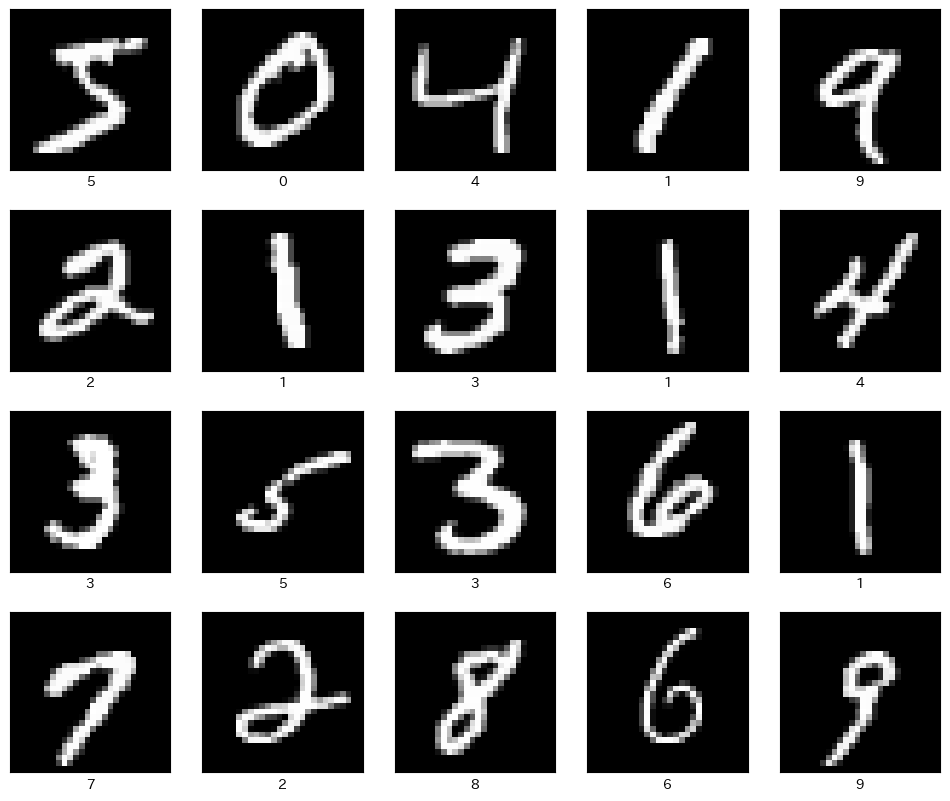

In [ ]:
def disp_data(xdata, ydata):
    plt.figure(figsize=(12,10))
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(xdata[i], cmap="gray")
        plt.xlabel(ydata[i])
    plt.show()

disp_data(x_train, y_train)

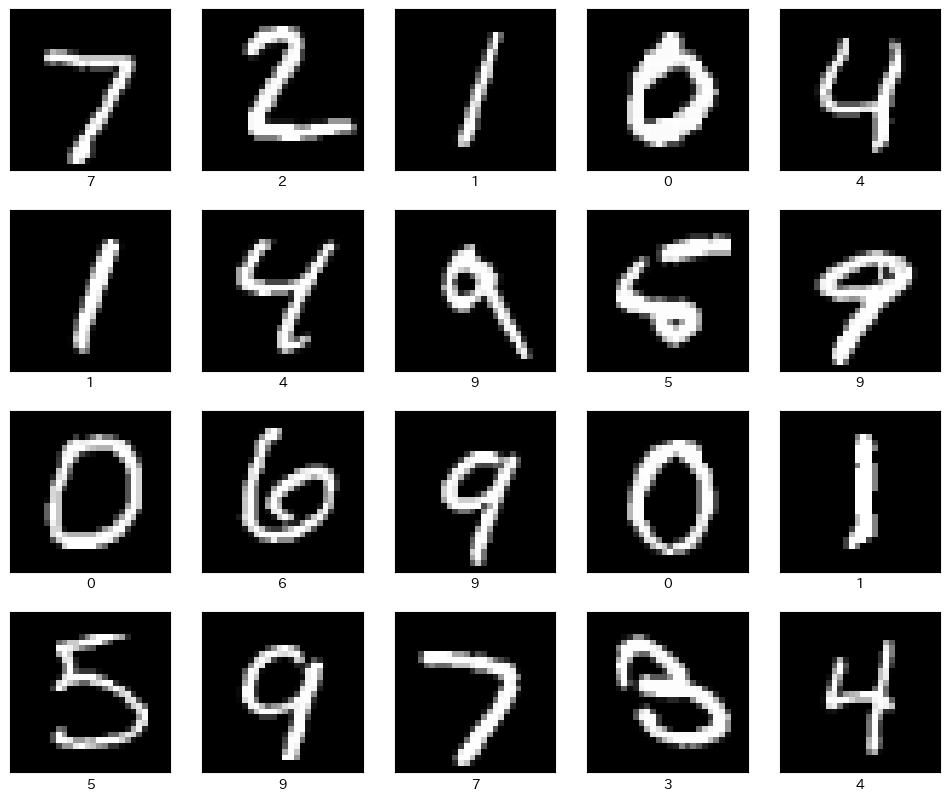

In [ ]:
disp_data(x_test, y_test)

In [ ]:
# 1次元配列に変更する
model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 学習の実行
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"テストデータの正解率: {test_acc:.2%}")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8806 - loss: 0.4256 - val_accuracy: 0.9605 - val_loss: 0.1344
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9669 - loss: 0.1159 - val_accuracy: 0.9666 - val_loss: 0.1049
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9759 - loss: 0.0787 - val_accuracy: 0.9737 - val_loss: 0.0808
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9829 - loss: 0.0576 - val_accuracy: 0.9751 - val_loss: 0.0827
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9862 - loss: 0.0442 - val_accuracy: 0.9800 - val_loss: 0.0694
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9896 - loss: 0.0339 - val_accuracy: 0.9783 - val_loss: 0.0766
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9920 - loss: 0.0271 - val_accuracy: 0.9746 - val_loss: 0.0833
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9943 - loss: 0.0197 - 

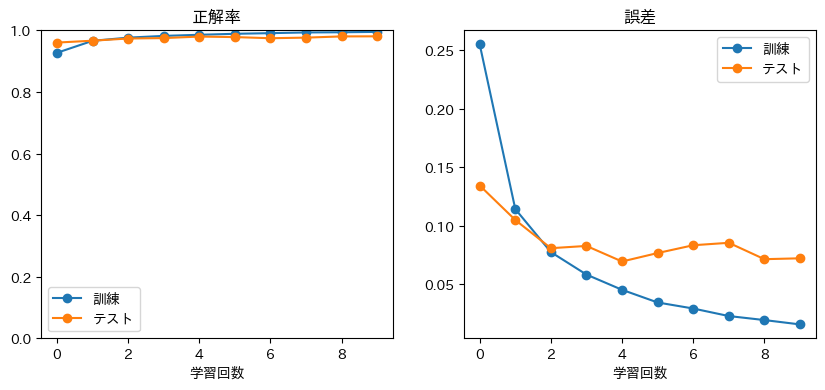

In [ ]:
# 学習の様子を可視化
param = [["正解率","accuracy","val_accuracy"],
         ["誤差","loss","val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]],"o-")
    plt.plot(history.history[param[i][2]],"o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"],loc="best")
    if i==0:
        plt.ylim(0,1)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


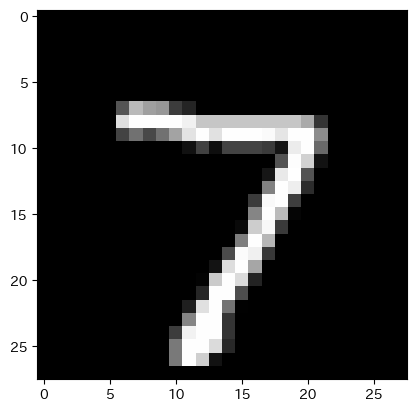

画像:7 正解:7 確率:100.00%


In [ ]:
# データを渡して予測
pre = model.predict(x_test)

i = 0
plt.imshow(x_test[i], cmap="gray")
plt.show()

index=np.argmax(pre[i])
pct = pre[i][index]
print(f"画像:{index} 正解:{y_test[i]} 確率:{pct:.2%}")

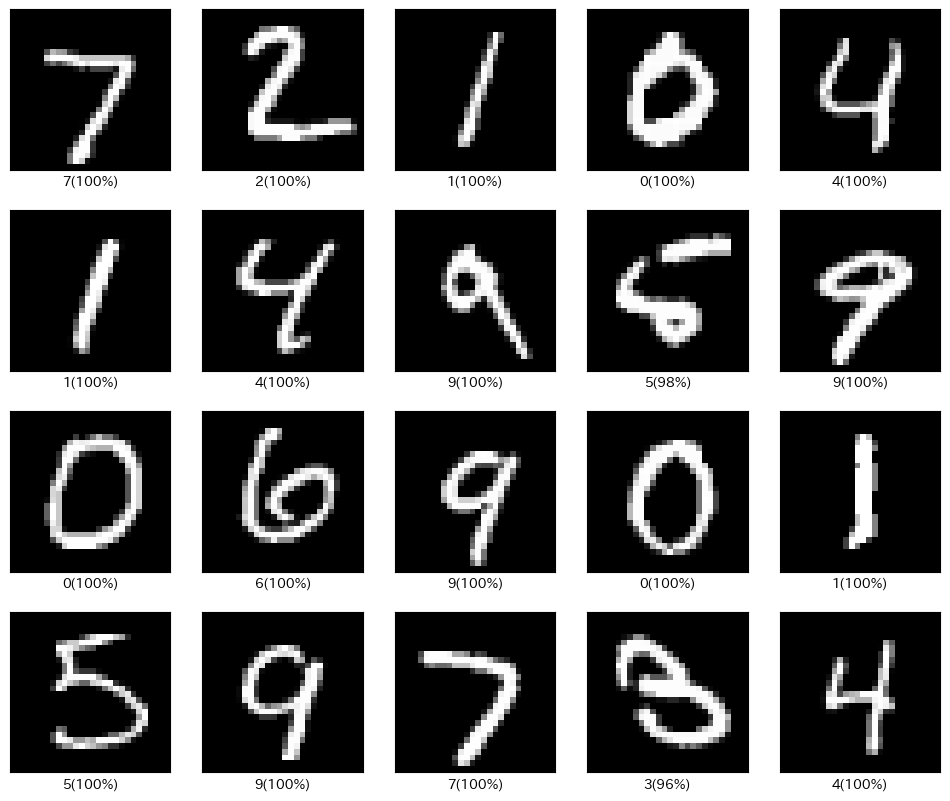

In [ ]:
# もっと予測させてみる
plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap="gray")

    index=np.argmax(pre[i])
    pct = pre[i][index]
    ans=""
    if index != y_test[i]:
        ans = "x--o["+str(y_test[i])+"]"
    lbl = f"{index}({pct:.0%}{ans})"
    plt.xlabel(lbl)
plt.show()

# MNIST(Sklearn)の学習

In [ ]:
!pip install japanize_matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=ac5f191fabf6c0a9c8dba8c475a536601ed8b7925628c0347841e7de3d5e5f8f
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib


In [ ]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
digits = sklearn.datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, X_test = X_train / 255.0, X_test / 255.0
print("学習データ", X_train.shape)
print("検証データ", X_test.shape)

学習データ (1347, 64)
検証データ (450, 64)


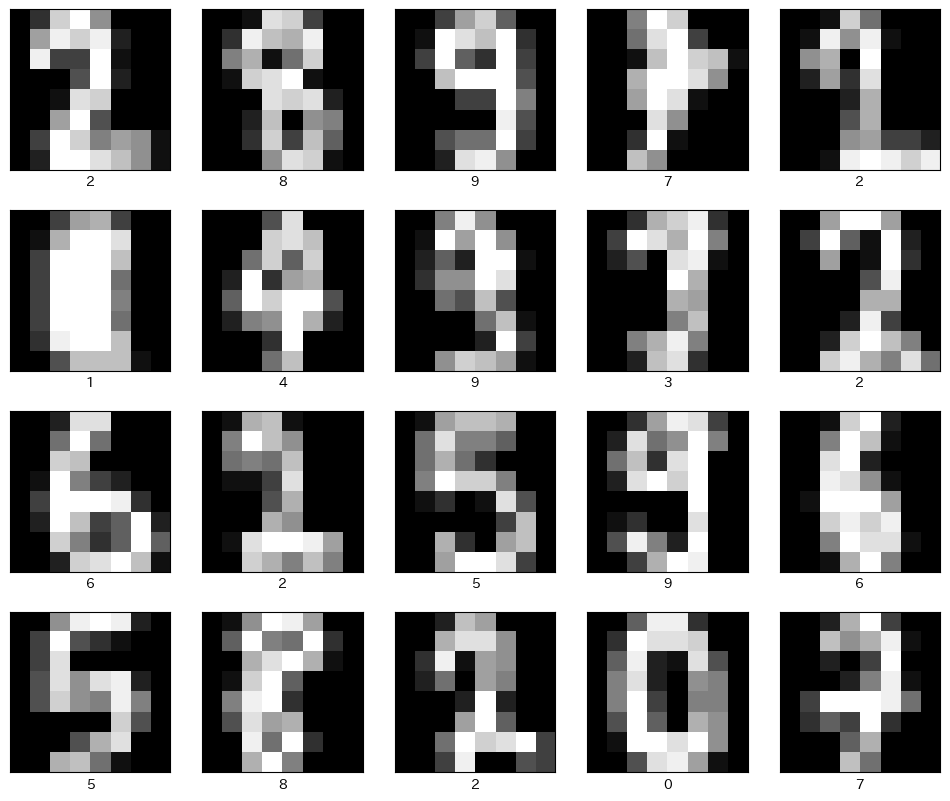

In [ ]:
# 画像データを表示
def disp_data(xdata, ydata):
    plt.figure(figsize=(12,10))
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(xdata[i].reshape(8,8), cmap="gray")
        plt.xlabel(ydata[i])
    plt.show()

disp_data(X_train, y_train)

In [ ]:
# model を作成
model = keras.models.Sequential()
model.add(layers.Dense(128, activation='relu', input_dim=64))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,610 (37.54 KB)

 Trainable params: 9,610 (37.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 学習を実行
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test, y_test))
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"テストデータの正解率: {test_acc:.2%}")

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.3250 - loss: 2.2818 - val_accuracy: 0.6933 - val_loss: 2.2258
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6748 - loss: 2.2037 - val_accuracy: 0.7022 - val_loss: 2.1331
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7146 - loss: 2.1008 - val_accuracy: 0.7089 - val_loss: 2.0077
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7535 - loss: 1.9568 - val_accuracy: 0.7289 - val_loss: 1.8492
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 1.7722 - val_accuracy: 0.7444 - val_loss: 1.6701
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7789 - loss: 1.5980 - val_accuracy: 0.7689 - val_loss: 1.4909
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 1.4266 - val_accuracy: 0.8022 - val_loss: 1.3261
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7838 - loss: 1.2696 - val_accuracy: 0.8333 - val_loss

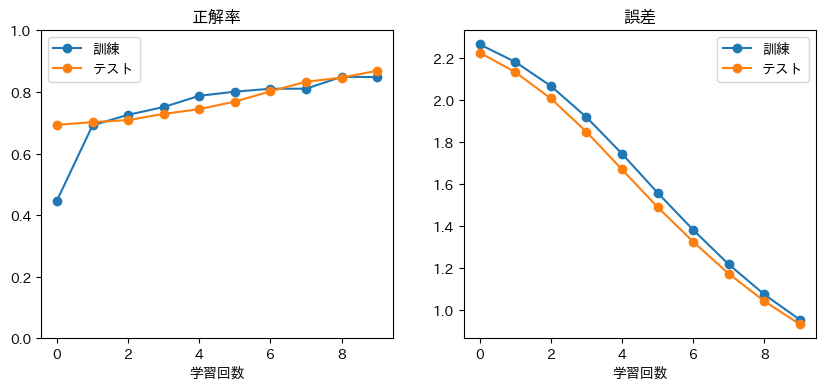

In [ ]:
# 学習の様子を可視化
param = [["正解率","accuracy","val_accuracy"],
         ["誤差","loss","val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]],"o-")
    plt.plot(history.history[param[i][2]],"o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"],loc="best")
    if i==0:
        plt.ylim(0,1)
plt.show()

In [ ]:
# 中間ニューロンを増やして model を作成
model = keras.models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_dim=64))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1024)                │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,126,410 (4.30 MB)

 Trainable params: 1,126,410 (4.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 学習を実行
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test, y_test))
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"テストデータの正解率: {test_acc:.2%}")

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.4657 - loss: 2.0849 - val_accuracy: 0.8222 - val_loss: 0.9484
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8338 - loss: 0.7343 - val_accuracy: 0.9089 - val_loss: 0.4052
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9020 - loss: 0.3586 - val_accuracy: 0.9400 - val_loss: 0.2484
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9313 - loss: 0.2320 - val_accuracy: 0.9467 - val_loss: 0.1993
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9398 - loss: 0.1990 - val_accuracy: 0.9533 - val_loss: 0.1684
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9580 - loss: 0.1415 - val_accuracy: 0.9356 - val_loss: 0.2120
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9467 - loss: 0.1571 - val_accuracy: 0.9400 - val_loss: 0.1938
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9688 - loss: 0.1134 - val_accuracy: 0.9556 - val_loss

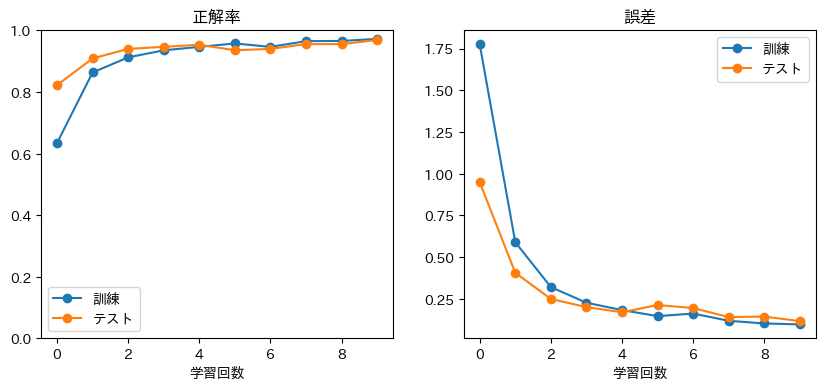

In [ ]:
# 学習の様子を可視化
param = [["正解率","accuracy","val_accuracy"],
         ["誤差","loss","val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]],"o-")
    plt.plot(history.history[param[i][2]],"o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"],loc="best")
    if i==0:
        plt.ylim(0,1)
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


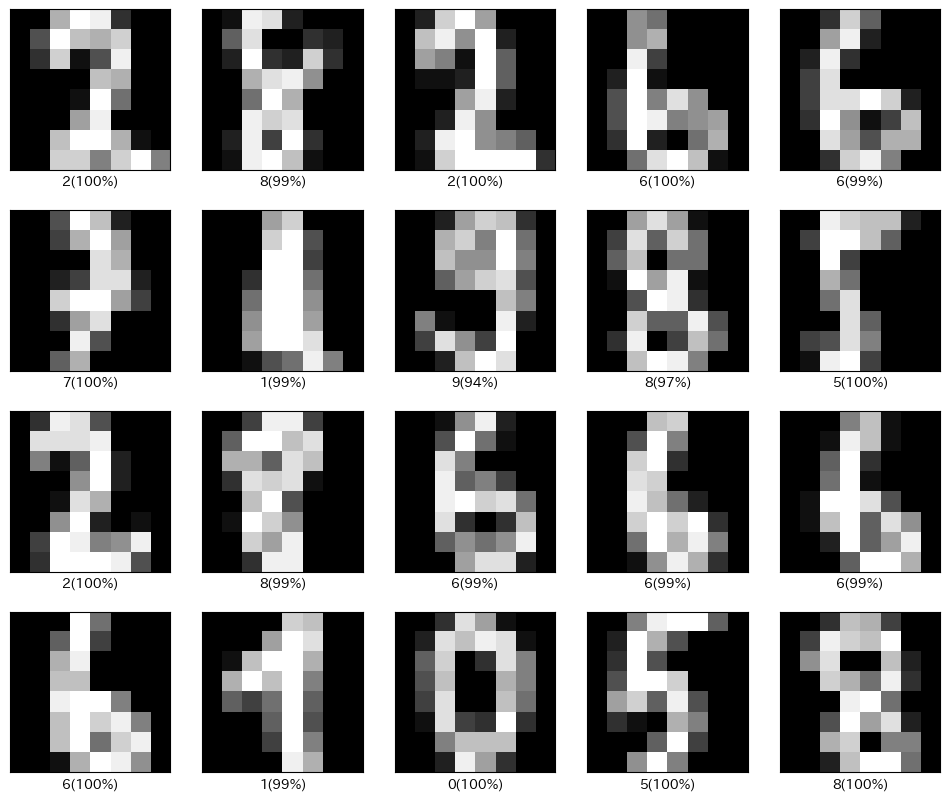

In [ ]:
# データを渡して予測
pre = model.predict(X_test)
plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(8,8), cmap="gray")

    index = np.argmax(pre[i])
    pct = pre[i][index]
    ans=""
    if index != y_test[i]:
        ans = "x--o["+str(y_test[i])+"]"
    lbl = f"{index}({pct:.0%}{ans})"
    plt.xlabel(lbl)
plt.show()

# ファッションの画像(MNIST)の学習

In [1]:
!pip install japanize_matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 29.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=a17f058c0c145fd480ec3e64fe28a1541b4a9a50203e6d629de4cc1f0cd67ad4
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib


In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("学習データ", x_train.shape)
print("検証データ", x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
学習データ (60000, 28, 28)
検証データ (10000, 28, 28)


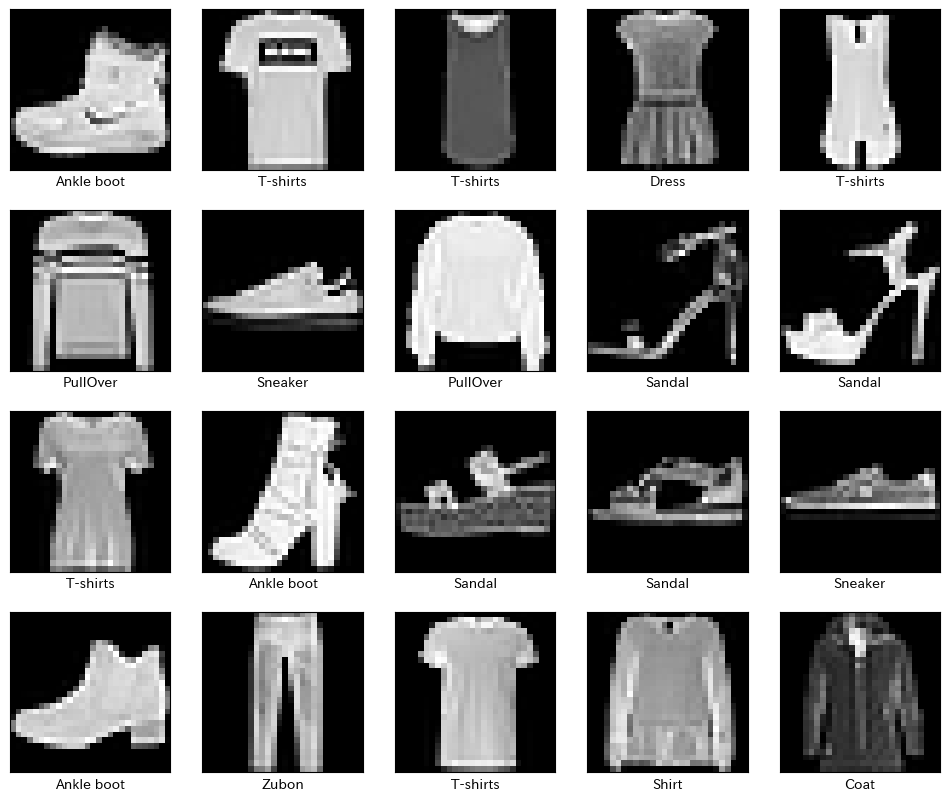

In [3]:
class_name = ["T-shirts","Zubon","PullOver","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
def disp_data(xdata, ydata):
    plt.figure(figsize=(12,10))
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(xdata[i], cmap="gray")
        plt.xlabel(class_name[y_train[i]])
    plt.show()

disp_data(x_train, y_train)

In [5]:
# modelを作って学習
model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 学習を実行
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"テストデータの正解率: {test_acc:.2%}")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7812 - loss: 0.6284 - val_accuracy: 0.8443 - val_loss: 0.4344
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8605 - loss: 0.3861 - val_accuracy: 0.8593 - val_loss: 0.3941
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8742 - loss: 0.3443 - val_accuracy: 0.8663 - val_loss: 0.3703
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8851 - loss: 0.3140 - val_accuracy: 0.8705 - val_loss: 0.3651
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8917 - loss: 0.2965 - val_accuracy: 0.8670 - val_loss: 0.3659
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8959 - loss: 0.2827 - val_accuracy: 0.8728 - val_loss: 0.3534
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9015 - loss: 0.2688 - val_accuracy: 0.8736 - val_loss: 0.3466
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9040 - loss: 0.2569 - 

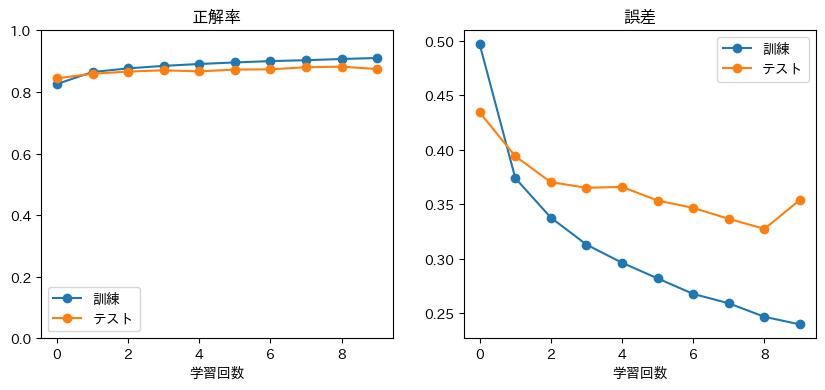

In [10]:
# 学習の様子を可視化
param = [["正解率","accuracy","val_accuracy"],
         ["誤差","loss","val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]],"o-")
    plt.plot(history.history[param[i][2]],"o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"],loc="best")
    if i==0:
        plt.ylim(0,1)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


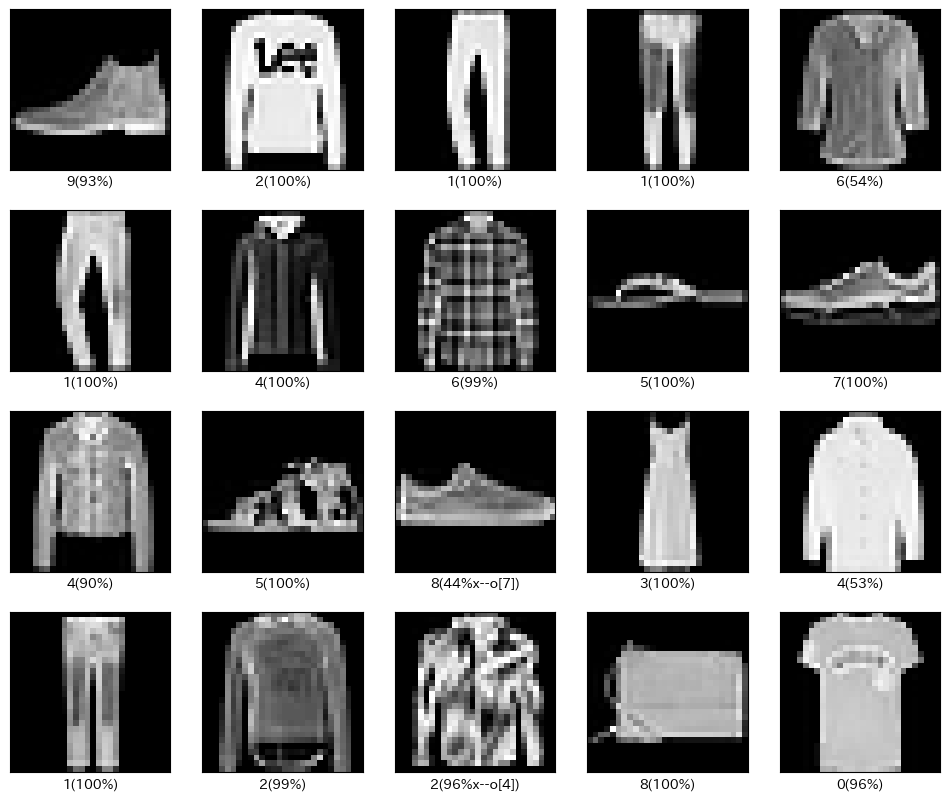

In [14]:
# データを渡して予測
pre = model.predict(x_test)
plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap="gray")

    index = np.argmax(pre[i])
    pct = pre[i][index]
    ans=""
    if index != y_test[i]:
        ans = "x--o["+str(y_test[i])+"]"
    lbl = f"{index}({pct:.0%}{ans})"
    plt.xlabel(lbl)
plt.show()